### Draft code for Labb3 Linear Calssifier

In [83]:
import matplotlib.pyplot as plt
import numpy as np

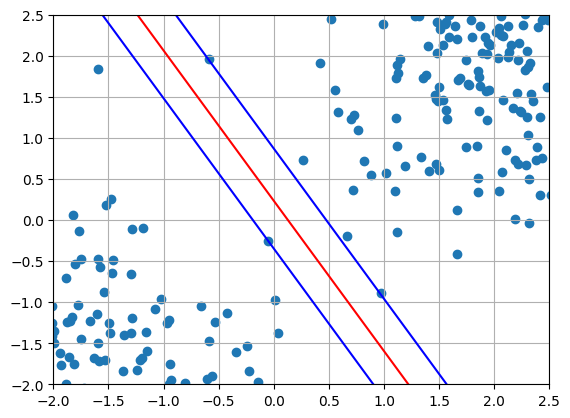

In [84]:
# Formmeln för den röda linjen är y = -1,83*x + 1,369

with open ("../Labs/Data/unlabelled_data.csv", "r") as unlable_data_r:
    data =[point.strip().split(",") for point in unlable_data_r.readlines()]
    data = [[float(point) for point in points] for points in data]
plt.scatter(*zip(*data))
plt.axline((-0.2, 0.6),slope=-1.83, color="red")
plt.axline((0, 0.87),slope=-1.83, color="blue")
plt.axline((-0.19, 0),slope=-1.83, color="blue")

plt.grid()
plt.xlim(-2, 2.5)
plt.ylim(-2, 2.5)
plt.show()

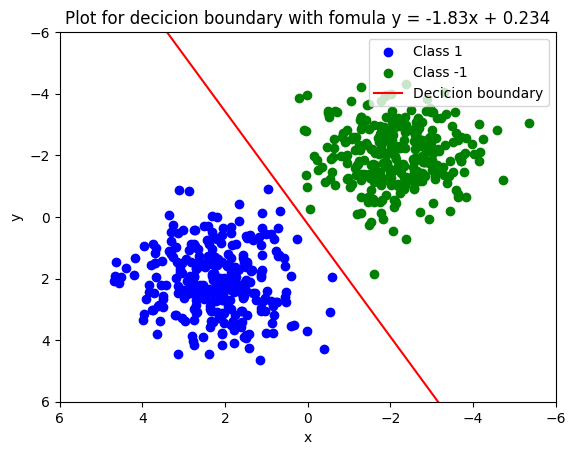

In [106]:
import matplotlib.pyplot as plt
import numpy as np

class LineClassfier:
    def __init__(self, data, k=-1.83, m=0.234):
        self.k = k
        self.m = m
        self.unlabled_data = data
        self.labled_data = []
    
    def classifier(self):
        # Classifies after wich formula given for the boundary line, y > or < kx + m
        for x, y in self.unlabled_data:
            if y > self.k * x + self.m:
                self.labled_data.append((x, y, 1))
            else:
                self.labled_data.append((x, y, -1))

        return self.labled_data
   

    def make_data_file(self):
        # Creats a file with label data
        with open ("../Labs/Data/labelled_data.csv", "w") as lable_data_w:
            lable_data_w.write("Lable data list\n")
            lable_data_w.write("---------------------------------------------------\n")
            for line in self.labled_data:
                lable_data_w.write(f"|{line[0]:<20} | {line[1]:<20} | {line[2]:<2} |\n")
                lable_data_w.write("---------------------------------------------------\n")
    


    def plot(self):
        # Split the labeled data into two classes based on the label
        class_1 = [(point[0], point[1]) for point in self.labled_data if point[2] == 1]
        class_0 = [(point[0], point[1]) for point in self.labled_data if point[2] == -1]

        # Scatter plot for each class
        plt.scatter(*zip(*class_1), label="Class 1", color='blue')
        plt.scatter(*zip(*class_0), label="Class -1", color='green')

        # Gives the x value for plotting the decicion boundary
        decicion_x = np.linspace(min(point[0] for point in self.labled_data), max(point[0] for point in self.labled_data), 100)
       
        # y = kx + m
        decicion_y = self.k * decicion_x + self.m

        plt.plot(decicion_x, decicion_y, color="red", label= "Decicion boundary")
        plt.xlim(6, -6)
        plt.ylim(6, -6)
        plt.legend()
        plt.xlabel("x")
        plt.ylabel("y")
        plt.title(f"Plot for decicion boundary with fomula y = {self.k}x + {self.m}")
        
        return plt.show()

    if __name__ == "__main__":

        with open ("../Labs/Data/unlabelled_data.csv", "r") as unlable_data_r:
            data =[point.strip().split(",") for point in unlable_data_r.readlines()]
            data = [[float(point) for point in points] for points in data]

        my_line = LineClassfier(data)
        my_line.classifier()
        my_line.make_data_file()
        my_line.plot()
        



        
